In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime


from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import os
import glob


In [4]:
# Generate target time to check on L dependnece 
target = [ '1900-'+np.str(month).zfill(2)+'-'+np.str(15).zfill(2) for month in np.arange(1,13)]
# transform them in correct dtype
target = [np.datetime64(it) for it in target ]
target = [pd.DatetimeIndex([it]) for it in target ]

In [5]:
MASK_url = 'http://iridl.ldeo.columbia.edu/expert/SOURCES/.Models/.SubX/'
MASK_url1 = '/.hindcast/.pr'
MASK_url2 = '/dup/.SOURCES/.Features/.Political/.World/.Countries/.the_geom/objectid/135/VALUE/rasterize/dods'
url3 = '/Y/(23N)/(50N)/RANGEEDGES/X/(130W)/(60W)/RANGEEDGES'  

i_v_u ='EMC/.GEFS'
#                'GMAO/.GEOS_V2p1',
#                'NRL/.NESM',
#                'RSMAS/.CCSM4',
#                'NCEP/.CFSv2'
              #]

ds_mask = xr.open_dataset(MASK_url+i_v_u+MASK_url1+url3+MASK_url2)
ds_mask['the_geom']=xr.where(ds_mask.the_geom!=0, 1, 0)

ds_mask = ds_mask.rename({'X':'lon', 'Y':'lat'})
ds_mask = ds_mask.isel(objectid=0, drop=True)
ds_mask.coords['lon'] = ds_mask.lon+360.



# PLOTS

In [6]:
# import cartopy.crs as ccrs


In [7]:
narr_clim_test_3d = xr.open_dataset('narr_clim_test_3d.nc')
persiann_clim_test_3d = xr.open_dataset('persiann_clim_test_3d.nc')
cpc_clim_test_3d = xr.open_dataset('cpc_clim_test_3d.nc')
ds_clim_test_3d = xr.open_dataset('ds_clim_test_3d.nc')

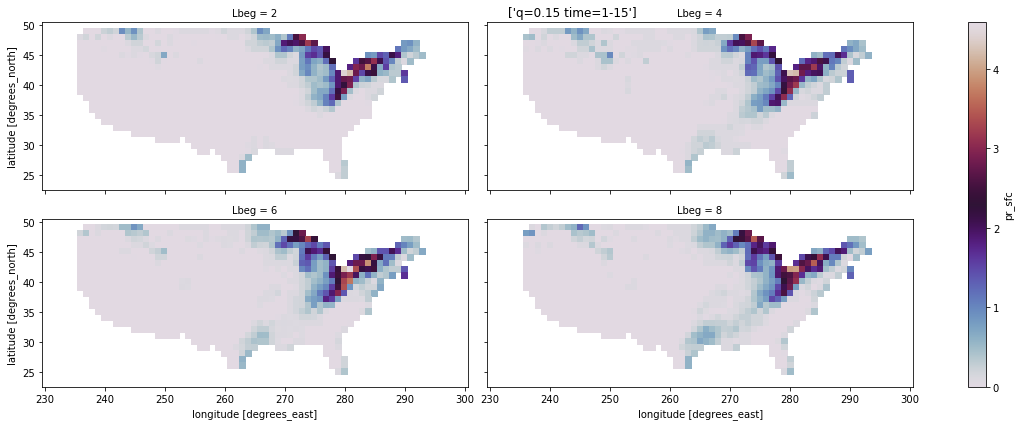

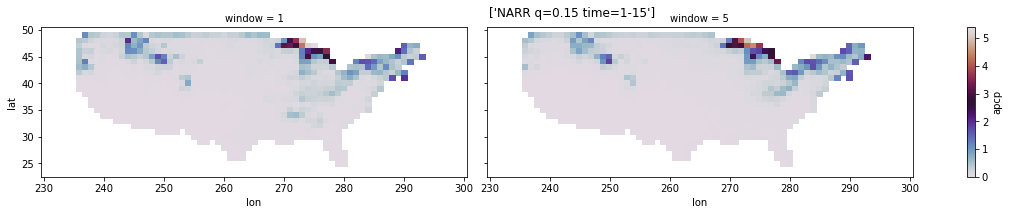

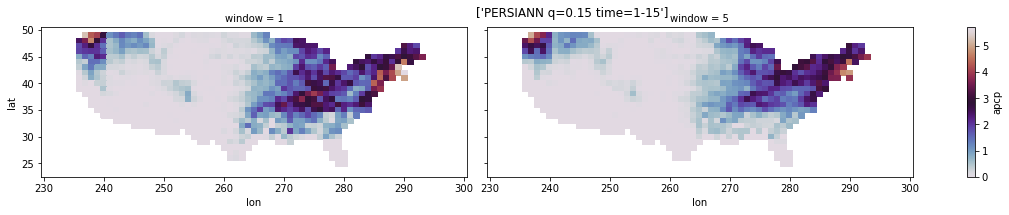

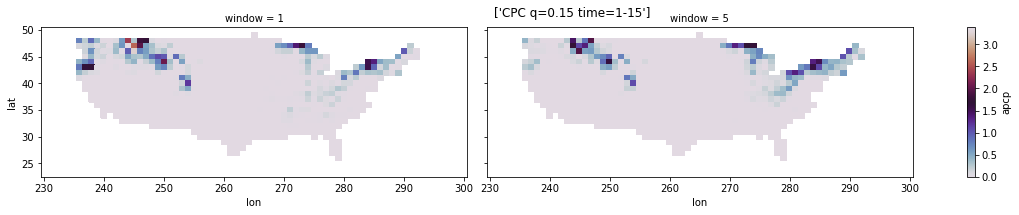

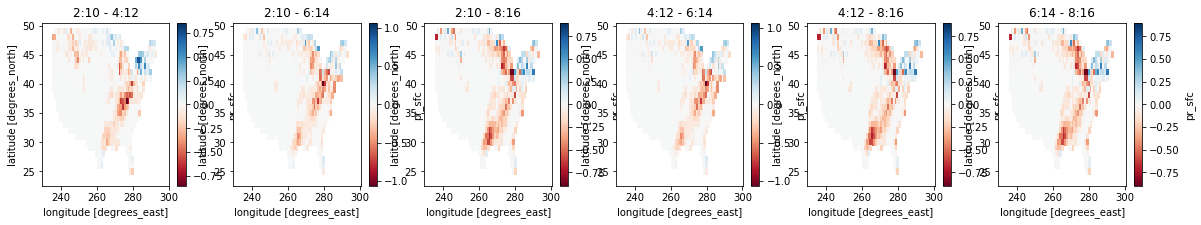

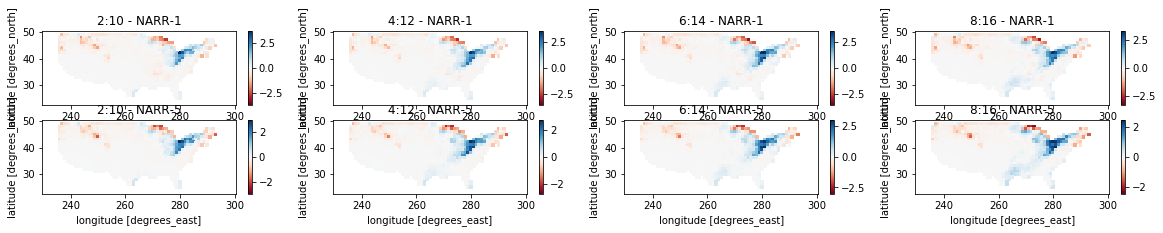

In [ ]:
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import warnings
warnings.filterwarnings("ignore")
# map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

for iT in ds_clim_test_3d.target_clim:
    temp = ds_clim_test_3d.sel(target_clim=iT.values)
    tempn = narr_clim_test_3d.sel(target_clim=iT.values)
    tempp = persiann_clim_test_3d.sel(target_clim=iT.values)
    tempc = cpc_clim_test_3d.sel(target_clim=iT.values)
    for iq in temp.quant:
        temp1 = temp.sel(quant=iq.values)
        temp1n = tempn.sel(quant=iq.values)
        temp1p = tempp.sel(quant=iq.values)
        temp1c = tempc.sel(quant=iq.values)
        temp1 = xr.where(temp1<0,0,temp1)
        temp1p = xr.where(temp1p<0,0,temp1p)
        temp1c = xr.where(temp1c<0,0,temp1c)
#         print(temp1)
        outp = temp1.pr_sfc.where(ds_mask.the_geom>0).plot(#transform=ccrs.PlateCarree(),
                          col='Lbeg', col_wrap=2,
#                                  figsize=(15*1.8,1.5*2),
                                 figsize=(8*2,3*2),
                         #subplot_kws={'projection': map_proj},
                         cmap='twilight')
        plt.suptitle(['q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
        outp = temp1n.apcp.where(ds_mask.the_geom>0).plot(#transform=ccrs.PlateCarree(),
                          col='window', col_wrap=2,
#                                  figsize=(15*1.8,1.5*2),
                                 figsize=(8*2,1.5*2),
                         #subplot_kws={'projection': map_proj},
                         cmap='twilight')
        plt.suptitle(['NARR q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
        outp = temp1p.apcp.where(ds_mask.the_geom>0).plot(#transform=ccrs.PlateCarree(),
                          col='window', col_wrap=2,
#                                  figsize=(15*1.8,1.5*2),
                                 figsize=(8*2,1.5*2),
                         #subplot_kws={'projection': map_proj},
                         cmap='twilight')
        plt.suptitle(['PERSIANN q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
        outp = temp1c.apcp.where(ds_mask.the_geom>0).plot(#transform=ccrs.PlateCarree(),
                          col='window', col_wrap=2,
#                                  figsize=(15*1.8,1.5*2),
                                 figsize=(8*2,1.5*2),
                         #subplot_kws={'projection': map_proj},
                         cmap='twilight')
        plt.suptitle(['CPC q='+np.str(iq.values)+' time='+np.str(iT.dt.month.values)+'-'+np.str(iT.dt.day.values)])
        plt.figure(figsize=(20,3))
        ax = plt.subplot(161)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 4:12')
        ax = plt.subplot(162)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[2]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 6:14')
        ax = plt.subplot(163)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - 8:16')
        ax = plt.subplot(164)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[2]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - 6:14')
        ax = plt.subplot(165)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - 8:16')
        ax = plt.subplot(166)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1.pr_sfc[3]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - 8:16')
        
        plt.figure(figsize=(20,3))
        ax = plt.subplot(241)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - NARR-1')
        ax = plt.subplot(242)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - NARR-1')
        ax = plt.subplot(243)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - NARR-1')        
        ax = plt.subplot(244)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - NARR-1')        
        ax = plt.subplot(245)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - NARR-5')
        ax = plt.subplot(246)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - NARR-5')
        ax = plt.subplot(247)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - NARR-5')        
        ax = plt.subplot(248)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - NARR-5')        #         for axi in outp.axes[:][0]:
        
        
        plt.figure(figsize=(20,3))
        ax = plt.subplot(241)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1p.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - PERSIANN-1')
        ax = plt.subplot(242)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1p.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - PERSIANN-1')
        ax = plt.subplot(243)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1p.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - PERSIANN-1')        
        ax = plt.subplot(244)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1p.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - PERSIANN-1')        
        ax = plt.subplot(245)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1p.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - PERSIANN-5')
        ax = plt.subplot(246)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1p.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - PERSIANN-5')
        ax = plt.subplot(247)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1p.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - PERSIANN-5')        
        ax = plt.subplot(248)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1p.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - PERSIANN-5')        #         for axi in outp.axes[:][0]:        

        plt.figure(figsize=(20,3))
        ax = plt.subplot(241)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1c.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - CPC-1')
        ax = plt.subplot(242)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1c.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - CPC-1')
        ax = plt.subplot(243)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1c.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - CPC-1')        
        ax = plt.subplot(244)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1c.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - CPC-1')        
        ax = plt.subplot(245)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[0]-temp1c.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('2:10 - CPC-5')
        ax = plt.subplot(246)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[1]-temp1c.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('4:12 - CPC-5')
        ax = plt.subplot(247)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[2]-temp1c.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('6:14 - CPC-5')        
        ax = plt.subplot(248)#,transform=ccrs.PlateCarree())
        (temp1.pr_sfc[3]-temp1c.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('8:16 - CPC-5')        #         for axi in outp.axes[:][0]:        

        
        plt.figure(figsize=(7,2))
        ax = plt.subplot(121)#,transform=ccrs.PlateCarree())
        (temp1p.apcp[0]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('PERSIANN 1 - NARR-1')
        ax = plt.subplot(122)#,transform=ccrs.PlateCarree())
        (temp1p.apcp[1]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('PERSIANN 5 - NARR-5')

        plt.figure(figsize=(7,2))
        ax = plt.subplot(121)#,transform=ccrs.PlateCarree())
        (temp1c.apcp[0]-temp1n.apcp[0]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('CPC 1 - NARR-1')
        ax = plt.subplot(122)#,transform=ccrs.PlateCarree())
        (temp1c.apcp[1]-temp1n.apcp[1]).where(ds_mask.the_geom>0).plot(ax = ax,
#                                                    subplot_kws={'projection': map_proj},
                                                   cmap='RdBu')
        ax.set_title('CPC 5 - NARR-5')
